In [12]:
# PyTorch 核心模块
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# torchvision 模块
from torchvision import datasets, transforms

# 高级模型模块（EfficientNet）
from efficientnet_pytorch import EfficientNet

# 数据处理与评估
import numpy as np
import pandas as pd
from PIL import Image
import random
from sklearn.metrics import f1_score

# 可视化工具
import matplotlib.pyplot as plt
from tqdm import tqdm

# 自定义数据集
from dataset import StoneDataset


In [13]:
# 使用训练集的均值和标准差
mean = [0.4602, 0.4554, 0.4505]
std = [0.1710, 0.1730, 0.1815]

# 数据增强和标准化（仅对训练集进行数据增强）
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(30),  # 随机旋转图像
    transforms.ToTensor(),  # 转换为Tensor
    transforms.Normalize(mean=mean, std=std)  # 标准化
])

# 验证集和测试集的预处理（仅标准化，不进行数据增强）
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为Tensor
    transforms.Normalize(mean=mean, std=std)  # 标准化
])

# 加载数据集时应用这些预处理
dataset_train = StoneDataset(root="./dataset/train_val", split="train", transforms=train_transform)
dataset_val = StoneDataset(root="./dataset/train_val", split="val", transforms=val_test_transform)
dataset_test = StoneDataset(root="./dataset/test", split="test", transforms=val_test_transform)

batch_size = 128
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 获取每个数据集的样本数量
train_size = len(dataset_train)
val_size = len(dataset_val)
test_size = len(dataset_test)

print(f"Train samples: {train_size}")
print(f"Validation samples: {val_size}")
print(f"Test samples: {test_size}")

print(f"Train batches: {len(train_loader)}")
print(f"Valid batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Train samples: 102213
Validation samples: 15000
Test samples: 15000
Train batches: 799
Valid batches: 118
Test batches: 118


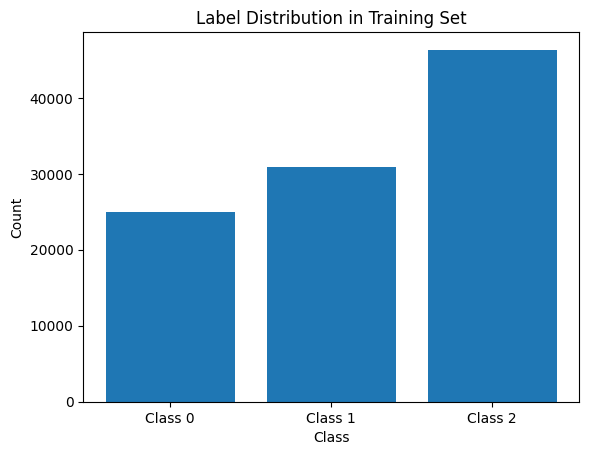

In [3]:
# 统计标签分布
def plot_label_distribution(dataset):
    # 绘制训练集标签分布的柱状图
    labels = dataset.labels
    label_counts = [labels.count(label) for label in set(labels)]
    plt.bar(range(len(label_counts)), label_counts)
    plt.title("Label Distribution in Training Set")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(range(len(label_counts)), ['Class 0', 'Class 1', 'Class 2'])
    plt.show()

plot_label_distribution(dataset_train)

Using device: cuda
Class weights: tensor([1.3637, 1.1028, 0.7354], device='cuda:0')
Loaded pretrained weights for efficientnet-b3

Epoch 1/12

Epoch 2/12

Epoch 3/12

Epoch 4/12

Epoch 5/12

Epoch 6/12

Epoch 7/12

Epoch 8/12

Epoch 9/12

Epoch 10/12
==> Unfreezing backbone for fine-tuning

Epoch 11/12

Epoch 12/12


Validating: 100%|██████████| 118/118 [01:12<00:00,  1.62it/s]


Epoch 1/12 - Train Loss: 0.8868, Acc: 57.99%, F1: 0.4601 | Val Loss: 0.7386, Acc: 67.18%, F1: 0.6731 | 


Validating: 100%|██████████| 118/118 [01:12<00:00,  1.63it/s]


Epoch 2/12 - Train Loss: 0.7896, Acc: 64.55%, F1: 0.5093 | Val Loss: 0.6700, Acc: 71.00%, F1: 0.7106 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Epoch 3/12 - Train Loss: 0.7410, Acc: 67.41%, F1: 0.5204 | Val Loss: 0.6321, Acc: 72.58%, F1: 0.7266 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s]


Epoch 4/12 - Train Loss: 0.6944, Acc: 69.72%, F1: 0.5286 | Val Loss: 0.6056, Acc: 74.57%, F1: 0.7457 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s]


Epoch 5/12 - Train Loss: 0.6570, Acc: 71.73%, F1: 0.5472 | Val Loss: 0.6023, Acc: 74.61%, F1: 0.7472 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Epoch 6/12 - Train Loss: 0.6406, Acc: 72.71%, F1: 0.5431 | Val Loss: 0.5874, Acc: 75.46%, F1: 0.7555 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Epoch 7/12 - Train Loss: 0.6108, Acc: 74.15%, F1: 0.5705 | Val Loss: 0.5819, Acc: 75.63%, F1: 0.7569 | 


Validating: 100%|██████████| 118/118 [01:12<00:00,  1.63it/s]


Epoch 8/12 - Train Loss: 0.5782, Acc: 75.92%, F1: 0.5636 | Val Loss: 0.5780, Acc: 75.48%, F1: 0.7555 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Epoch 9/12 - Train Loss: 0.5642, Acc: 76.47%, F1: 0.5692 | Val Loss: 0.5797, Acc: 76.19%, F1: 0.7628 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s]


Epoch 10/12 - Train Loss: 0.5317, Acc: 78.26%, F1: 0.5798 | Val Loss: 0.5808, Acc: 76.05%, F1: 0.7598 | 


Validating: 100%|██████████| 118/118 [01:15<00:00,  1.57it/s]


Epoch 11/12 - Train Loss: 0.5362, Acc: 78.00%, F1: 0.5661 | Val Loss: 0.5828, Acc: 76.15%, F1: 0.7615 | 


Validating: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Epoch 12/12 - Train Loss: 0.5087, Acc: 79.38%, F1: 0.5874 | Val Loss: 0.5827, Acc: 76.15%, F1: 0.7616 | 


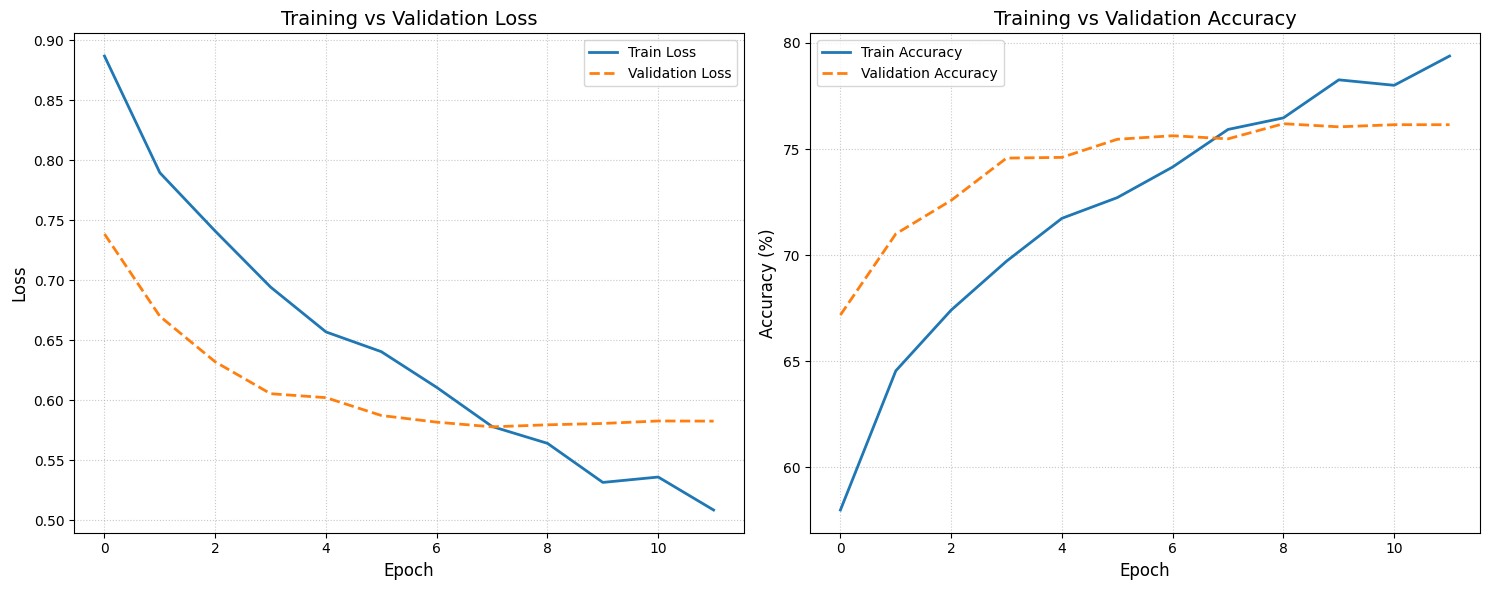


Final Performance:
Best Validation Accuracy: 76.19% at epoch 9
Best Validation F1 Score: 0.7628 at epoch 9


In [5]:
from torch.optim import AdamW
import torch.nn.init as init
import torchvision.models as models
from timm import create_model

# 设置随机种子以确保可重复性
def set_seed(seed=42):
    torch.manual_seed(seed)  
    torch.cuda.manual_seed(seed)  
    torch.cuda.manual_seed_all(seed)  
    np.random.seed(seed) 
    random.seed(seed)  
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = False 
    
set_seed(42)

# 使用预训练的EfficientNet-B0模型
class EfficientNetModel(nn.Module):
    def __init__(self, num_classes=3, freeze_backbone=True):
        super(EfficientNetModel, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b3')
        
        if freeze_backbone:
            for param in self.model.parameters():
                param.requires_grad = False

        # 修改分类层并初始化
        num_ftrs = self.model._fc.in_features
        self.model._fc = nn.Linear(num_ftrs, num_classes)

        # ✅ 显式初始化分类头（Xavier 更稳定）
        init.xavier_uniform_(self.model._fc.weight)
        if self.model._fc.bias is not None:
            init.zeros_(self.model._fc.bias)

    def forward(self, x):
        return self.model(x)
# Mixup实现
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# 训练函数
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    
    for inputs, labels in tqdm(train_loader, desc='Training'):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 应用Mixup
        inputs, labels_a, labels_b, lam = mixup_data(inputs, labels)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        # 对于Mixup，我们使用原始标签计算准确率
        correct += (lam * predicted.eq(labels_a).sum().float() 
                   + (1 - lam) * predicted.eq(labels_b).sum().float()).item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels_a.cpu().numpy())  # 使用原始标签计算F1分数
    
    train_loss = running_loss / len(train_loader)
    train_acc = 100.0 * correct / total
    train_f1 = f1_score(all_labels, all_preds, average='macro')
    return train_loss, train_acc, train_f1

# 验证函数
def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc='Validating'):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    val_loss = running_loss / len(val_loader)
    val_acc = 100.0 * correct / total
    val_f1 = f1_score(all_labels, all_preds, average='macro')
    return val_loss, val_acc, val_f1

# 测试函数
def test(model, test_loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            if len(batch) == 2:
                inputs, paths = batch
                inputs = inputs.to(device)
                labels = None
            else:
                inputs, labels = batch
                inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            
            if labels is not None:
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
    
    if total == 0:
        return 0.0, 0.0, 0.0
    
    test_loss = running_loss / len(test_loader)
    test_acc = 100.0 * correct / total
    test_f1 = f1_score(all_labels, all_preds, average='macro')
    return test_loss, test_acc, test_f1

if __name__ == '__main__':
    # 设置设备
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    ngpu = 8  # 使用4个GPU
    print(f"Using device: {device}")
    
    # 假设我们有3个类别
    num_classes = 3
    
    # 计算类别权重
    labels = dataset_train.labels
    class_counts = [labels.count(i) for i in range(num_classes)]
    total_samples = len(labels)
    class_weights = [total_samples / (num_classes * count) for count in class_counts]
    class_weights = torch.FloatTensor(class_weights).to(device)
    print(f"Class weights: {class_weights}")
    
    freeze_backbone = True  # 初始冻结
    model = EfficientNetModel(num_classes=num_classes, freeze_backbone=freeze_backbone)

    
    # 多GPU支持
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs!")
        model = nn.DataParallel(model, device_ids=list(range(ngpu)))
    
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4, weight_decay=1e-4 )
    
    # 训练过程记录
    train_losses, train_accs, train_f1s = [], [], []
    val_losses, val_accs, val_f1s = [], [], []
    test_losses, test_accs, test_f1s = [], [], []
    
    # 训练轮数
    epochs = 12
    freeze_epochs = 9  # 前3轮只训练分类层
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")

        # 如果到了解冻时机，就解冻特征提取层，并重设优化器
        if epoch == freeze_epochs:
            print("==> Unfreezing backbone for fine-tuning")
            for param in model.parameters():
                param.requires_grad = True
            optimizer = optim.Adam(model.parameters(), lr=1e-4)  # 更小 lr 微调整个网络
    
    # 训练循环
    for epoch in range(epochs):
        train_loss, train_acc, train_f1 = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1 = validate(model, val_loader, criterion, device)
        #test_loss, test_acc, test_f1 = test(model, test_loader, criterion, device)
        
        # 记录指标
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        train_f1s.append(train_f1)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_f1s.append(val_f1)
        #test_losses.append(test_loss)
        #test_accs.append(test_acc)
        #test_f1s.append(test_f1)
        
        # 打印结果
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.2f}%, F1: {train_f1:.4f} | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%, F1: {val_f1:.4f} | ")
    
    # 可视化训练过程
    plt.figure(figsize=(15, 6))

    # 1. Loss曲线
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', linestyle='-', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', linestyle='--', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.7)

    # 2. Accuracy曲线
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy', linestyle='-', linewidth=2)
    plt.plot(val_accs, label='Validation Accuracy', linestyle='--', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()
    
    # 输出最终性能
    print("\nFinal Performance:")
    print(f"Best Validation Accuracy: {max(val_accs):.2f}% at epoch {np.argmax(val_accs)+1}")
    print(f"Best Validation F1 Score: {max(val_f1s):.4f} at epoch {np.argmax(val_f1s)+1}")


In [6]:
import csv
import os

def test_and_save(model, test_loader, device, save_path='test_predictions_weighted.csv'):
    model.eval()
    predictions = []
    image_paths = [] 
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Predicting'):
            if len(batch) == 2:
                inputs, paths = batch
            else:
                inputs, _, paths = batch
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            predictions.extend(predicted.cpu().numpy())
            image_paths.extend(paths)

    # 保存为CSV文件
    with open(save_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'label'])
        for path, pred in zip(image_paths, predictions):
            writer.writerow([os.path.basename(path), pred])
    print(f"Saved predictions to {save_path}")

test_and_save(model, test_loader, device, save_path='test_predictions.csv')


Predicting: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Saved predictions to test_predictions5.csv


In [7]:
torch.save(model, 'best_model.pth')